In [336]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex

In [434]:
sm.init_printing(use_latex='mathjax')
x, y, c = sm.symbols('x, y, c', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u', real=True)
ux1 = Derivative(u(x), x)
ux1

d       
──(u(x))
dx      

In [439]:
zad1 = {'K': c*x**2,
        'f': 2*x**2 + 2*x,
        'a': 0.5, 'UA': 2,
        'b': 1.6, 'UB': 6}

zad0 = {'K': x,
        'f': x**(sm.Pow(3,-1))*4/3,
        'a': 0.5, 'UA': 1,
        'b': 1, 'UB': 2}

express = [
    lambda zad: {**zad, 'K':zad['K'], 'UA':zad['UA'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K']*c, 'UA':zad['UA'], 'UB':zad['UB'], 'c':2 },
    lambda zad: {**zad, 'K':zad['K']*c, 'UA':zad['UA'], 'UB':zad['UB'], 'c':0.1 },
    #lambda zad: {**zad, 'K':sm.Pow(zad['K'],-1), 'UA':zad['UA'], 'b':zad['b'], 'UB':zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':-zad['UA'], 'UB':zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':zad['UA'], 'UB':-zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':-zad['UA'], 'UB':-zad['UB'], 'c':1 }
]

In [436]:
rer = sm.Eq(Derivative(1/zad0['K']*ux1, x), - zad0['f'])
rer

  ⎛d       ⎞            
  ⎜──(u(x))⎟      3 ___ 
d ⎜dx      ⎟   -4⋅╲╱ x  
──⎜────────⎟ = ─────────
dx⎝   x    ⎠       3    

In [438]:
res = sm.integrate(Derivative(1/x*ux1, x), x)
res

KeyboardInterrupt: 

In [341]:
res2 = sm.Eq(ux1, sm.solve(res, ux1)[0])
res2

                 4/3
d          C₁ - x   
──(u(x)) = ─────────
dx             x    

In [342]:
res3 = sm.integrate(res2, x)
res3 = sm.Eq(res3.lhs, res3.rhs + C2)
#res3 = sm.expand(res3)
res3

                           4/3
                        3⋅x   
u(x) = C₁⋅log(x) + C₂ - ──────
                          4   

In [343]:
res4 = res3.subs(c, 1)
res4

                           4/3
                        3⋅x   
u(x) = C₁⋅log(x) + C₂ - ──────
                          4   

In [344]:
def getroots(expr, zad):
    tyt1 = sm.Eq(expr.rhs.subs(x, zad['a']), zad['UA'])
    tyt2 = sm.Eq(expr.rhs.subs(x, zad['b']), zad['UB'])
    sol = sm.solve((tyt1, tyt2), (C1, C2))
    return sol

def getresult(zad):
    rer = sm.Eq(Derivative(zad0['K']*ux1, x), - zad0['f'])
    
    res = sm.integrate(rer, x)
    res = sm.Eq(res.lhs, res.rhs + C1)
    
    res2 = sm.Eq(ux1, sm.solve(res, ux1)[0])
    
    res3 = sm.integrate(res2, x)
    res3 = sm.Eq(res3.lhs, res3.rhs + C2)
    
    res4 = res3.subs(c, zad['c'])
    
    sol = getroots(res3, zad)
    equation = res4.subs({C1:sol[C1], C2:sol[C2]})
    return [equation, sol]
    
def func1(zad):
    results = [getresult(expr(zad0)) for expr in express]
    display(results)

In [345]:
#%timeit -n 3 -r 3 print(tyt1)
#display(tyt1)
#display(tyt2)

In [372]:
res5 = res4.subs({C1:sol[C1], C2:sol[C2]})
res5

            4/3                                
         3⋅x                                   
u(x) = - ────── + 2.0953158917601⋅log(x) + 2.75
           4                                   

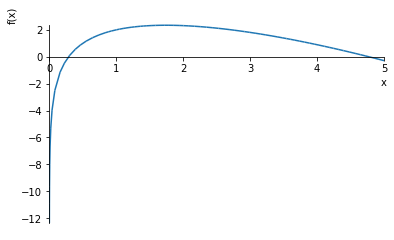

In [396]:
args = [(res5.rhs, (x, 0, 5))]
plot = sm.plot(*args, show=False, Legend=True)
plot.show()